# Export Plot to SVG, PDF, HTML, PNG

- [Export Using `ggsave()`](#Export-Using-ggsave())

  - [Export SVG to file](#Export-SVG-to-file)

  - [Export PDF to file](#Export-PDF-to-file)

  - [Export HTML to file](#Export-HTML-to-file)

  - [Export to PNG file](#Export-to-PNG-file)

- [Export Plot to a File or File-Like Object](#Export-Plot-to-a-File-or-File-Like-Object)

  - [Saving to a File](#Saving-to-a-File)

  - [Wrighting to a Stream of In-Memory Bytes](#Wrighting-to-a-Stream-of-In-Memory-Bytes)

- [Adjusting the Size and Aspect Ratio](#Adjusting-the-Size-and-Aspect-Ratio)

  - [Parameters `w`, `h`, `unit`, and `dpi`](#Parameters-w,-h,-unit,-and-dpi)

    - [72 dpi](#72-dpi)

    - [300 dpi](#300-dpi)
   
    - [Case of Mismatching Aspect Ratios](#Case-of-Mismatching-Aspect-Ratios)

In [1]:
import io

import numpy as np
import pandas as pd

from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
p = ggplot(df) + geom_point(aes("petal_length", "petal_width", color="species"), size=5) + ggsize(600, 400)
p

## Export Using `ggsave()`

The `ggsave()` function is an easy way to export plot to a file in SVG, PDF, HTML or PNG formats.

### Export SVG to file

In [5]:
fullpath_svg = ggsave(p, "plot.svg")

Load and display saved SVG.

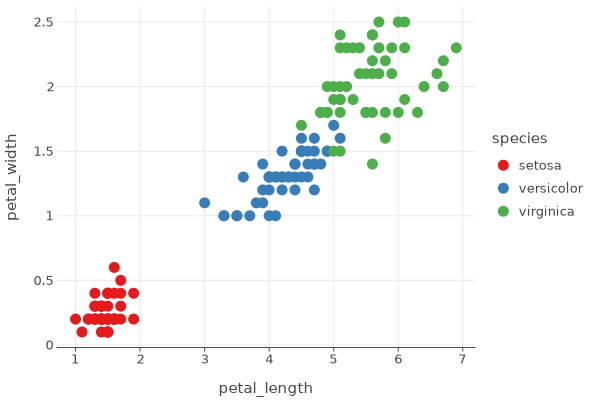

In [6]:
from IPython.display import SVG

SVG(filename=fullpath_svg)

### Export PDF to file

In [7]:
fullpath_pdf = ggsave(p, "plot.pdf")

Load and display saved PDF.

In [8]:
from os import getcwd
from IPython.display import IFrame

IFrame(fullpath_pdf.replace(getcwd(), "."), width=600, height=400)

### Export HTML to file

By default, when exporting HTML, `ggsave` wraps the HTML of the plot in an `iframe` that matches the size of the plot.

In [9]:
fullpath_html = ggsave(p, "plot.html")

Load and display saved HTML.

In [10]:
from IPython.display import HTML

HTML(filename=fullpath_html)

Use the `iframe=False` option to only export the HTML of the plot, without adding an `iframe`.

In [11]:
fullpath_no_iframe = ggsave(p, "no_iframe_plot.html", iframe=False)

In [12]:
HTML(filename=fullpath_no_iframe)

### Export to PNG file

To export plot to a PNG file you should install the [CairoSVG](https://pypi.org/project/CairoSVG/) library to your Python environment.

To save plot as a PNG file use a filename that have "png" extension. 

In [13]:
fullpath_png = ggsave(p, "plot.png")

Load and display saved PNG.

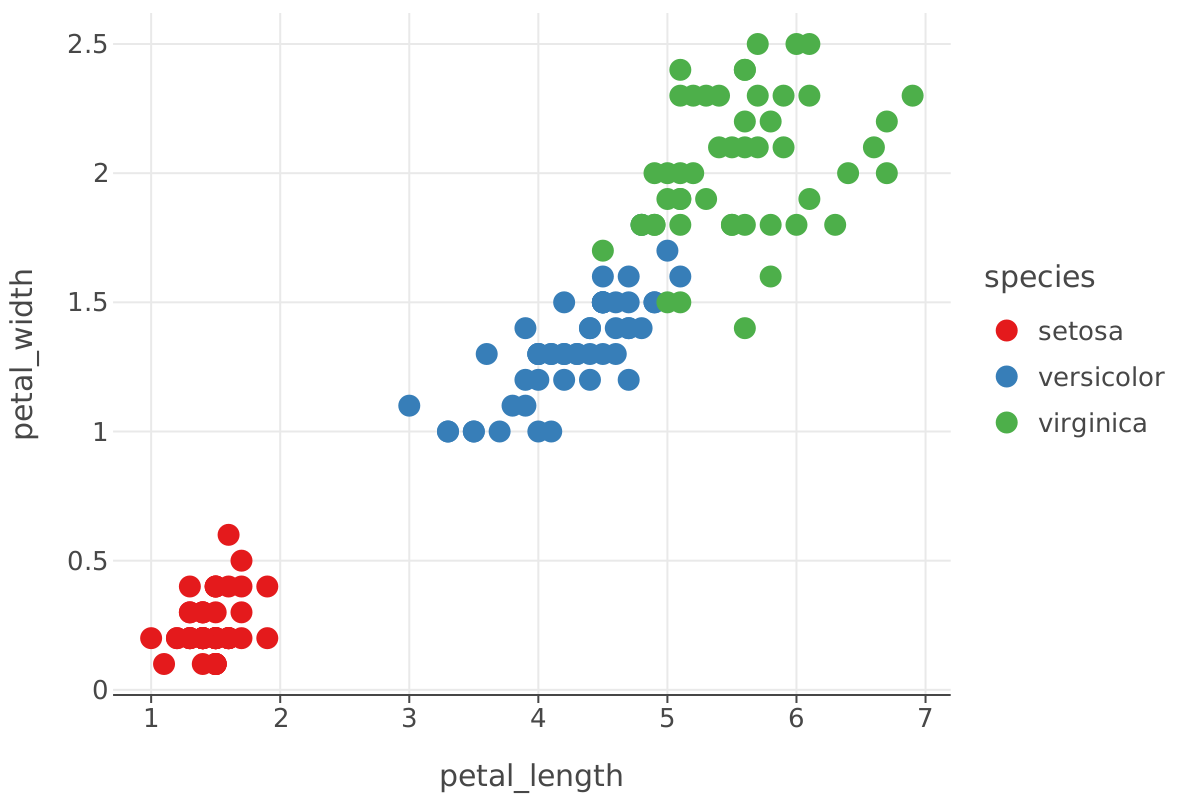

In [14]:
from IPython.display import Image

Image(filename=fullpath_png, width=600, height=400)

## Export Plot to a File or File-Like Object

You can export figure created by `ggplot()` or `gggrid()` functions <br>
to a vector or raster format using the following methods: 
- `to_svg(path)`
- `to_html(path, iframe)`
- `to_png(path, scale)`
- `to_pdf(path, scale)`

To save plot to a file on disc, specify the file' pathname in `path`. <br>
To stream plot image to a file-like object, supply such object in the `path` parameter instead of a pathname.

### Saving to a File

In [15]:
path = p.to_svg("lets-plot-images/to_svg_plot.svg")

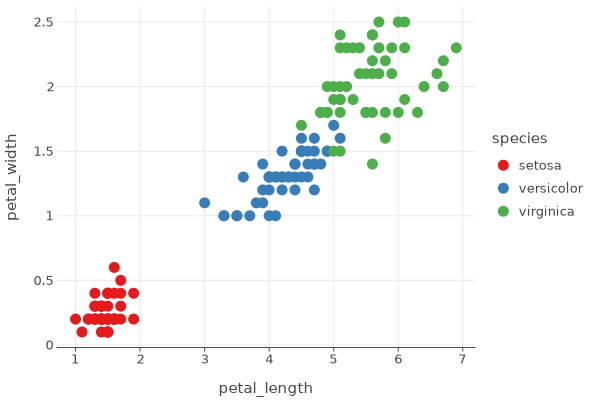

In [16]:
SVG(path)

### Wrighting to a Stream of In-Memory Bytes

In [17]:
stream = io.BytesIO()

p.to_svg(stream)

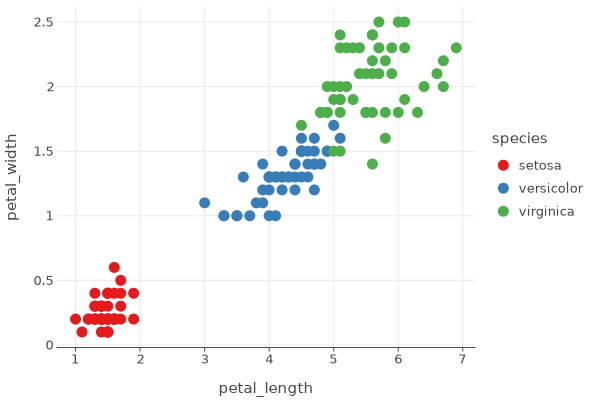

In [18]:
SVG(stream.getvalue())

## Adjusting the Size and Aspect Ratio

### Parameter `scale`

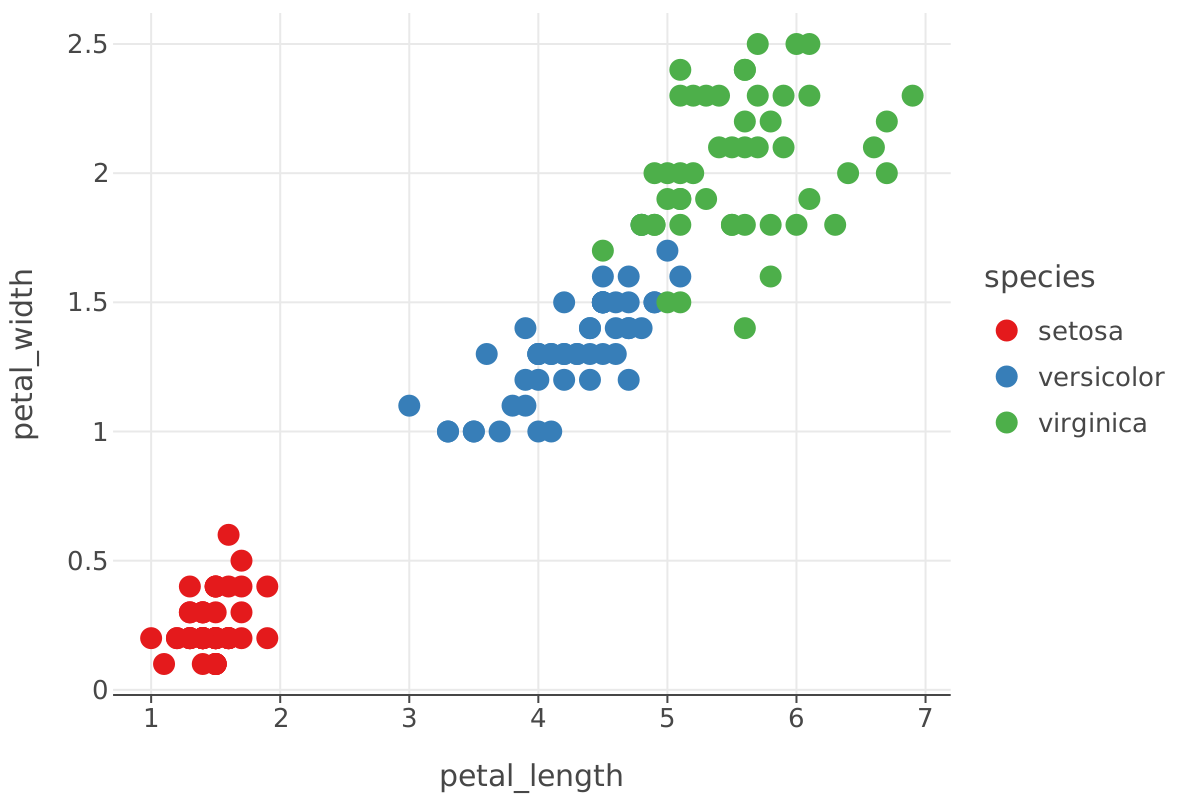

In [19]:
# default scale is 2.0
img_scale_default = ggsave(p, "scale_default_plot.png")
Image(filename=img_scale_default)

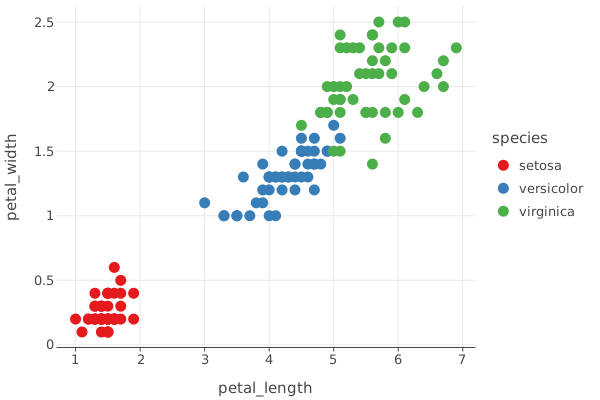

In [20]:
# use custom scale
img_scale_1 = ggsave(p, "scale_1_plot.png", scale=1)
Image(filename=img_scale_1)

### Parameters `w`, `h`, `unit`, and `dpi`

These parameters allow you to configure the export of your plot to raster formats (PNG, PDF) with specific physical dimensions:

- `w` and `h`: Define the width and height of the output image in the specified unit.
- `unit`: Specifies the unit of measurement (`'in'`, `'cm'`, or `'mm'`).
- `dpi`: Sets the resolution in dots per inch.

This is how they work:

1. If `w`, `h`, `unit`, and `dpi` are all specified:
   - `scale` is ignored.
   - The plot's pixel size (default or set by `ggsize()`) is converted to the specified units using the given dpi.
   - If the aspect ratio of `w` and `h` differs from the plot's pixel aspect ratio:
     * The plot maintains its original (pixel) aspect ratio.
     * It's fitted within the specified `w × h` area.
     * Any extra space is left empty.
2. If `w`, `h` are not specified:
   - The `scale` parameter is used to determine the output size.

#### 72 dpi

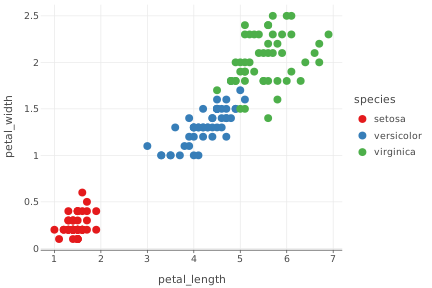

In [21]:
img_72 = ggsave(p, "72dpi_plot.png", w=6, h=4, unit='in', dpi=72)
Image(filename=img_72, width=900, height=600)

#### 300 dpi

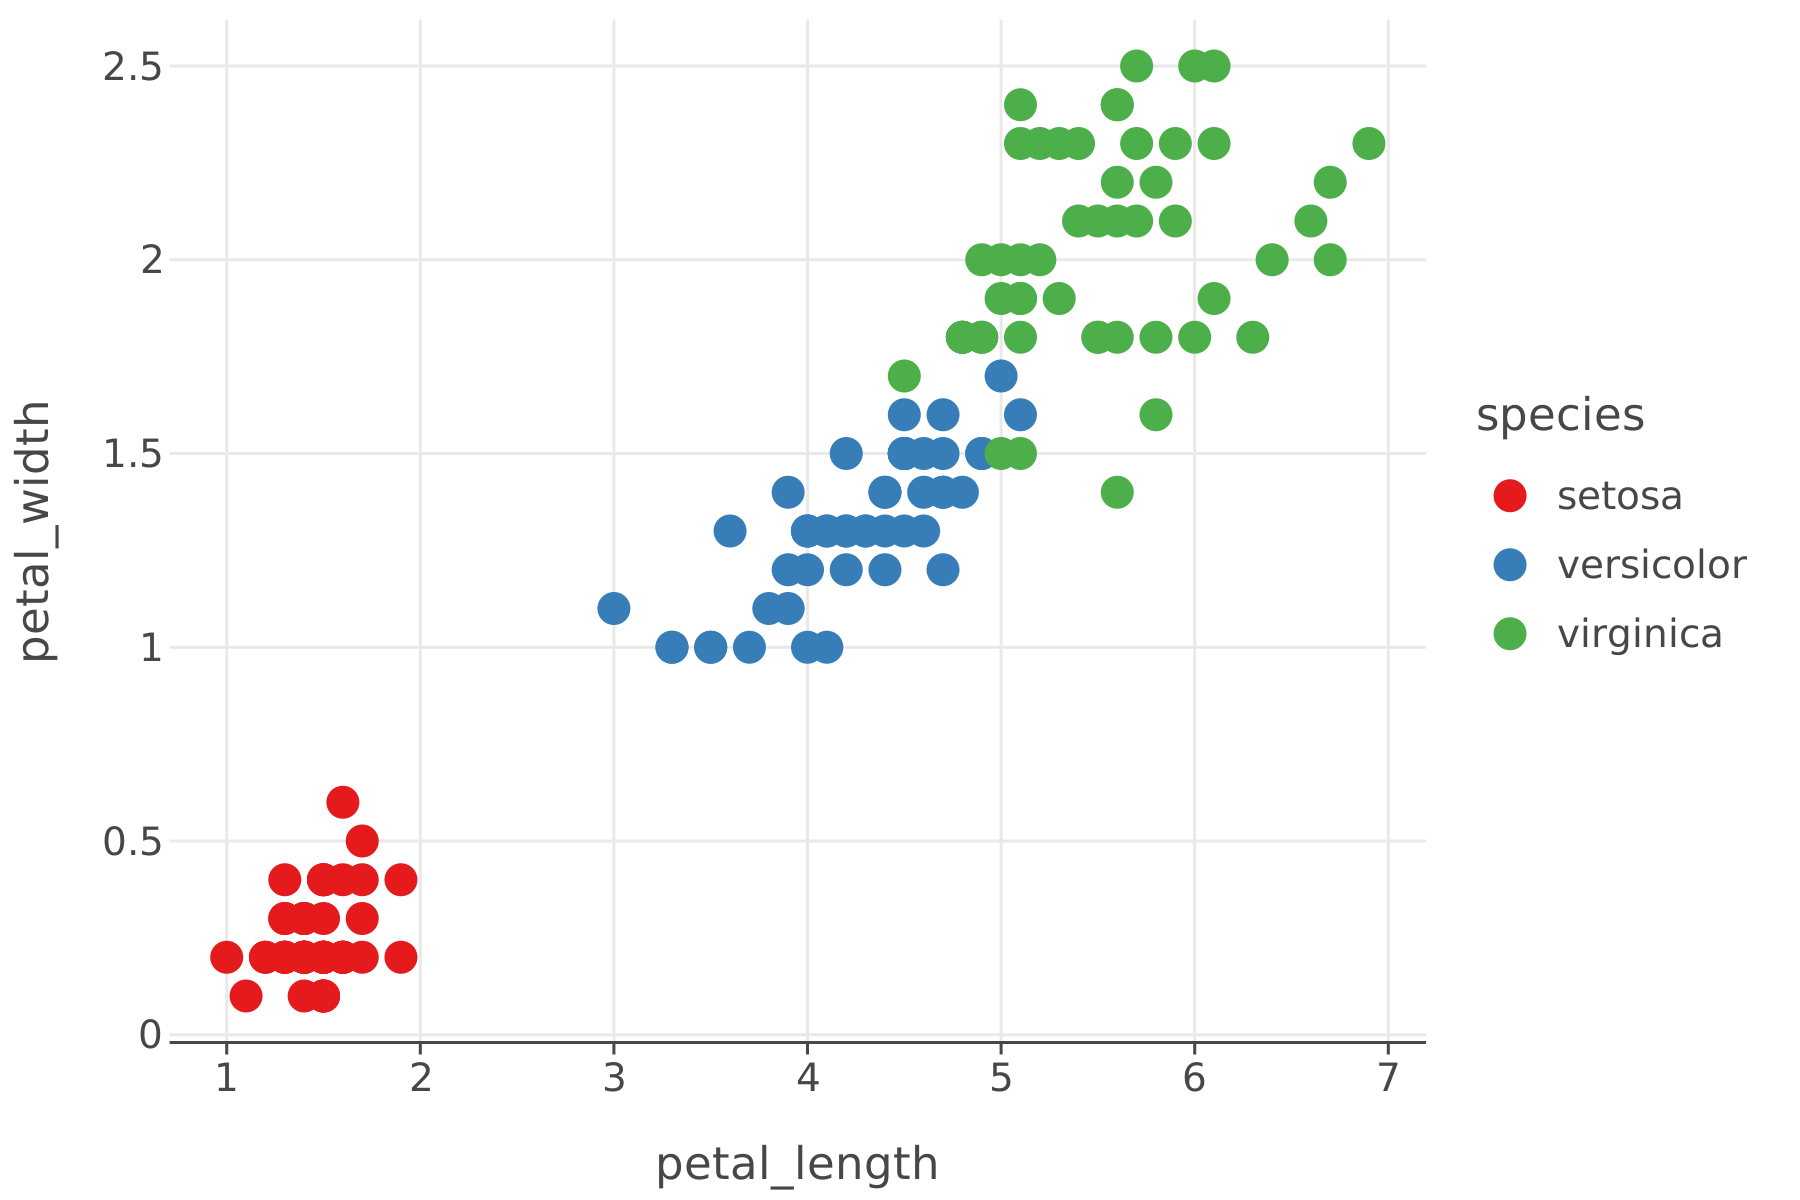

In [22]:
img_300 = ggsave(p, "300dpi_plot.png", w=6, h=4, unit='in', dpi=300)
Image(filename=img_300, width=900, height=600)

#### Case of Mismatching Aspect Ratios

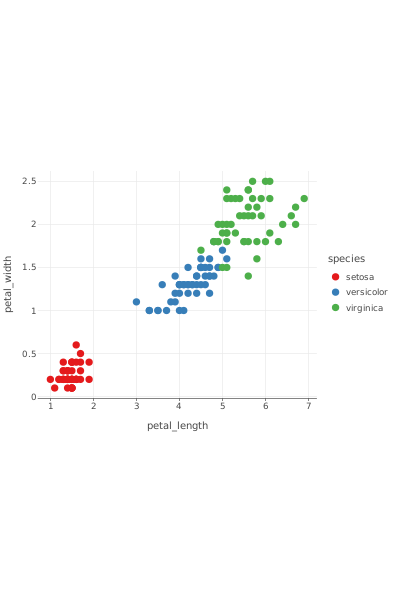

In [23]:
# w/h = 1.5 for the plot p, but w/h = 0.66 for the saved image.
# As a result there is a blank space above and below the plot.
img_inversed_ar = ggsave(p, "inversed_ar_plot.png", w=4, h=6, unit='in', dpi=100)
Image(filename=img_inversed_ar)